# DATA EXPLORATION AND VISUALIZATION

TEAM: Abraham Borg, Sarom Thin, Mehar Rekhi, Cristian Vazquez

We will explore the data and try to answer the following questions: 

What were the most common first 8 moves for white and black each year? How have these opening moves changed over time?

For each year in the data set, which pieces were most commonly left in play at the endgame? 

Is there a piece in the game that is a good predictor of who will win? For example, if white loses a bishop first, does that correlate with more losses for white? 

If a player still has their queen and the other player doesn't, does the player with the queen always win? 

How many pieces are usually left when the game ends?

How often does each player lose their queen, and how does that correlate to wins or losses.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from matplotlib import rcParams
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

# switch to seaborn default stylistic parameters
# see the useful https://seaborn.pydata.org/tutorial/aesthetics.html

sns.set()
sns.set_context('paper') # 'talk' for slightly larger

# change default plot size
rcParams['figure.figsize'] = 9,7

Get PKL file with chess data from this link, https://github.com/abecsumb/DataScienceProject/blob/main/chess_data.pkl?raw=true

In [2]:
# read pkl file from local folder. The file contains the dataframe.
chess_data = pd.read_pickle('https://github.com/abecsumb/DataScienceProject/blob/main/chess_data.pkl?raw=true', compression = 'zip')

In [3]:
chess_data.head()

,Date,Game Result,W-ELO,B-ELO,Num Moves,W1,B1,W2,B2,W3,B3,W4,B4,W5,B5,W6,B6,W7,B7,W8,B8,W9,B9,W10,B10,W11,B11,W12,B12,W13,B13,W14,B14,W15,B15,W16,B16,W17,B17,W18,B18,W19,B19,W20,B20,W21,B21,W22,B22,W23,B23,W24,B24,W25,B25,W26,B26,W27,B27,W28,B28,W29,B29,W30,B30,W31,B31,W32,B32,W33,B33,W34,B34,W35,B35,W36,B36,W37,B37,W38,B38,W39,B39,W40,B40,W41,B41,W42,B42,W43,B43,W44,B44,W45,B45,W46,B46,W47,B47,W48,B48,W49,B49,W50,B50,W51,B51,W52,B52,W53,B53,W54,B54,W55,B55,W56,B56,W57,B57,W58,B58,W59,B59,W60,B60,W61,B61,W62,B62,W63,B63,W64,B64,W65,B65,W66,B66,W67,B67,W68,B68,W69,B69,W70,B70,W71,B71,W72,B72,W73,B73,W74,B74,W75,B75
Game1,2000,1-0,2851,2555,147,d4,d5,c4,e6,Nc3,Nf6,cxd5,exd5,Bg5,c6,Qc2,Be7,e3,Nbd7,Bd3,O-O,Nge2,Re8,O-O,Nf8,f3,Ng6,Rad1,h6,Bxf6,Bxf6,Bxg6,fxg6,e4,g5,e5,Be7,f4,gxf4,Nxf4,Rf8,Ng6,Rxf1+,Rxf1,Be6,Ne2,Qd7,h4,Re8,Ng3,Bf7,Nxe7+,Rxe7,Nf5,Re6,Nd6,Bg6,Qc3,Rxd6,exd6,Qxd6,Qa3,Qb8,Qe7,Qg3,Rf3,Qg4,Qf8+,Kh7,Qf4,Qd7,Rg3,Be4,Qe5,Qf7,h5,Qd7,b4,a6,a4,Kg8,a5,Kh7,Kf2,Kg8,Qb8+,Kh7,Qf8,Bc2,Qf4,Be4,Qe5,Kg8,Ke3,Kh7,Ke2,Kg8,Qb8+,Kh7,Qf8,Bc2,Kd2,Be4,Kc1,Qc7,Rg4,Qd7,Rf4,Bxg2,Qf5+,Qxf5,Rxf5,Kg8,d2,h3,f4,e6,e3,f7,f5,f8,e5,e8,f4,f7,g4,e8,g3,f7,f4,e8,f5,xh5,e6,g6,e3,c2,f3+,g8,5,xb5,xd5,4,c4,3,c3,5,5,4,f4,5,6,<NA>,<NA>,<NA>
Game2,2000,1-0,2851,2544,45,e4,c5,Nf3,Nc6,Bb5,d6,c3,Nf6,Qe2,e5,d4,exd4,cxd4,a6,e5,Nd5,exd6+,Be6,Bxc6+,bxc6,dxc5,Qa5+,Bd2,Qxc5,O-O,Kd7,Na3,Bxd6,Rab1,Bf5,Rbc1,Rhe8,Qd1,Qa7,Nc4,Bc7,Bc3,f6,Nd4,Be6,Nxc6,Kxc6,Bd4,Qb8,Qa4+,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Game3,2000,1-0,2851,2748,90,d4,d5,c4,c6,Nc3,Nf6,Nf3,dxc4,a4,Bf5,Ne5,Nbd7,Nxc4,Qc7,g3,e5,dxe5,Nxe5,Bf4,Nfd7,Bg2,g5,Ne3,gxf4,Nxf5,O-O-O,Qc2,Ng4,a5,fxg3,hxg3,a6,Ra4,Ndf6,Ne4,Nxe4,Bxe4,h5,Kf1,Kb8,Kg2,Be7,Nxe7,Qxe7,Bf3,Ne5,Bxh5,Qe6,Qc3,f6,Rah4,Qf5,Bf3,Rxh4,Rxh4,Qb1,Rh1,Rd1,Rxd1,Qxd1,b4,Kc7,Qc5,Qd6,Qxd6+,Kxd6,Be4,Nc4,Bd3,Nb2,f4,Nd1,g4,Ne3+,Kf3,Nd5,Ke4,Nxb4,Bc4,c5,g5,fxg5,fxg5,Ke7,Kf5,Nc2,Ke5,Ne3,Be6,c4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Game4,2000,1-0,2851,2637,51,e4,e5,Nf3,Nf6,Nxe5,d6,Nf3,Nxe4,d4,d5,Bd3,Be7,O-O,Nc6,c4,Nb4,Be2,O-O,Nc3,Bf5,a3,Nxc3,bxc3,Nc6,Re1,Bf6,Bf4,Ne7,Qb3,b6,cxd5,Nxd5,Be5,Bg4,Rad1,Be7,h3,Bh5,g4,Bg6,Bg3,Nf6,Ne5,Ne4,Bf3,Nxg3,Nc6,Qd6,Nxe7+,Kh8,Bxa8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Game5,2000,1-0,2851,2751,69,e4,e6,d4,d5,Nc3,Nf6,Bg5,dxe4,Nxe4,Nbd7,Nf3,Be7,Nxf6+,Bxf6,h4,O-O,Bd3,c5,Qe2,cxd4,Qe4,g6,O-O-O,Qa5,Bxf6,Nxf6,Qxd4,Nh5,a3,Rd8,Qe3,Bd7,g4,Nf6,Qf4,Nd5,Qh6,Nf6,Ng5,Bc6,Bxg6,hxg6,Nxe6,fxe6,Qxg6+,Kh8,Qxf6+,Kh7,Rhe1,Rxd1+,Rxd1,Qc5,g5,Rf8,Qh6+,Kg8,Qxe6+,Kg7,Qh6+,Kg8,Qg6+,Kh8,Qh6+,Kg8,Qe6+,Kg7,Rd6,Be8,Qe7+,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,

In [4]:
chess_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156417 entries, Game1 to Game156417
Columns: 155 entries, Date to B75
dtypes: int32(4), string(151)
memory usage: 183.8+ MB


Let's explore how many games were played in each year. We see that we can probably remove games that were played 1970 and earlier since there are so few of them. 

In [5]:
chess_data[['Date']].value_counts()

Date
2004    14738
2005    13852
2003    13185
2002    12167
2006    11229
2001    10411
2000     9783
1999     8473
1998     7820
1997     6876
1996     6647
1995     5598
1994     4816
1993     4046
2007     3365
1992     3350
1991     2857
1990     2391
1989     2076
1988     1865
1987     1195
1986      994
1984      900
1985      892
1981      855
1982      831
1983      722
1980      717
1978      693
1979      597
1977      453
1976      439
1972      404
1975      375
1974      287
1973      269
1971      168
1970       26
1968       18
1966       11
1906        8
1964        7
1905        5
1958        3
1956        2
1952        1
dtype: int64

In [6]:
# Let's take out any games on or before 1970 since there are so few of them
chess_data = chess_data[chess_data['Date'] > 1970]

In [7]:
chess_data[['Date']].value_counts()

Date
2004    14738
2005    13852
2003    13185
2002    12167
2006    11229
2001    10411
2000     9783
1999     8473
1998     7820
1997     6876
1996     6647
1995     5598
1994     4816
1993     4046
2007     3365
1992     3350
1991     2857
1990     2391
1989     2076
1988     1865
1987     1195
1986      994
1984      900
1985      892
1981      855
1982      831
1983      722
1980      717
1978      693
1979      597
1977      453
1976      439
1972      404
1975      375
1974      287
1973      269
1971      168
dtype: int64

In our current dataset we observe that White has slightly more wins than Black. White is expected to win more than Black on average because it is generally accepted that White has an advantage. Chess.com compiles and analyzes their own database of chess games. White consistently wins more often than Black in their dataset.

In [8]:
chess_data[['Game Result']].value_counts()

Game Result
1-0            88204
0-1            68132
dtype: int64

Digging deeper we observe that there are mostly games in which White had a higher ELO rating than Black. This fact indicates that there could be a strong correlation between the ELO rating of a player and how often they beat the player with a weaker ELO rating. 

In [9]:
chess_data[chess_data['W-ELO'] > chess_data['B-ELO']].shape

(81061, 155)

In [10]:
chess_data[chess_data['B-ELO'] > chess_data['W-ELO']].shape

(73582, 155)

Further analysis reveals that the White and Black ELO in this dataset is almost identical. But white wins more games. One explanation for this fact is that White may have an inherent advantage over Black since White moves first.

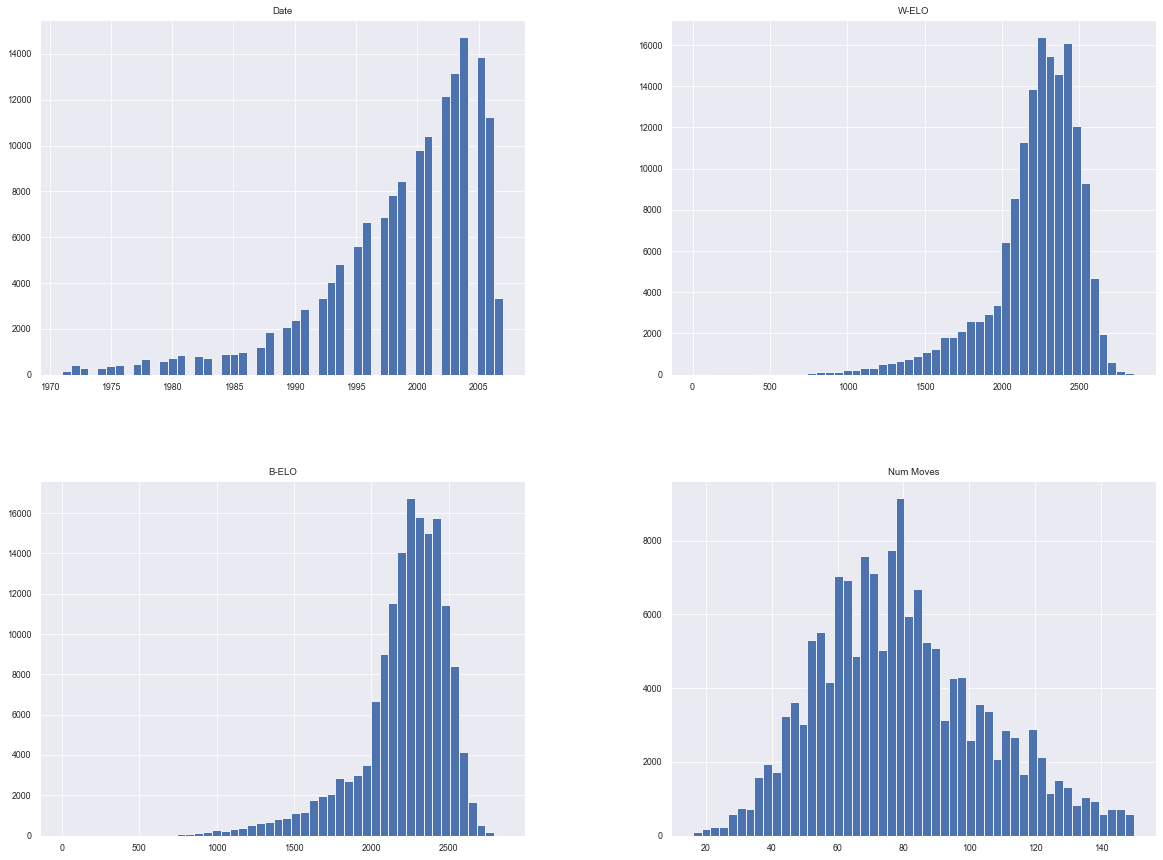

In [11]:
chess_data.hist(bins = 50, figsize = (20, 15));

White has a higher ELO on average than Black.

In [12]:
chess_data['B-ELO'].mean()

2206.689905076246

In [13]:
chess_data['W-ELO'].mean()

2215.2228597380004

In the scatter matrix we can se that there is a strong correlation between W-ELO and B-ELO. This makes a lot of sense, because as White gets better, so does Black in order to stay competitive. We also observe that this data set has a nice mix of amateur games and also top player games by looking at the spread of ELO ratings versus date. We also note that the number of moves per game is evenly spread between few and many. That is interesting because the team assumed that there would be many more long games as the ELO ratings went up, but that is not the case.

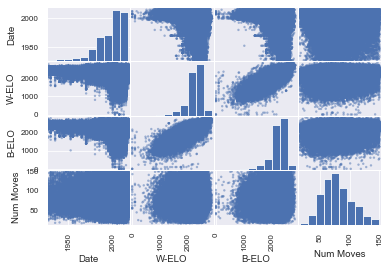

In [14]:
pd.plotting.scatter_matrix(chess_data[['Date', 'W-ELO', 'B-ELO', 'Num Moves']]);

Next, let's explore the common openings for White and Black. we make a few more dataframes that are views into chess_data. This will make it a little easier to do analysis. 

In [15]:
# consider the opening as the first 8 moves (each side).
openings_white = chess_data.loc[:, 'W1': 'W8': 2] 
openings_black = chess_data.loc[:, 'B1': 'B8': 2] 

In [16]:
openings_white.head()

,W1,W2,W3,W4,W5,W6,W7,W8
Game1,d4,c4,Nc3,cxd5,Bg5,Qc2,e3,Bd3
Game2,e4,Nf3,Bb5,c3,Qe2,d4,cxd4,e5
Game3,d4,c4,Nc3,Nf3,a4,Ne5,Nxc4,g3
Game4,e4,Nf3,Nxe5,Nf3,d4,Bd3,O-O,c4
Game5,e4,d4,Nc3,Bg5,Nxe4,Nf3,Nxf6+,h4


In [17]:
openings_black.head()

,B1,B2,B3,B4,B5,B6,B7,B8
Game1,d5,e6,Nf6,exd5,c6,Be7,Nbd7,O-O
Game2,c5,Nc6,d6,Nf6,e5,exd4,a6,Nd5
Game3,d5,c6,Nf6,dxc4,Bf5,Nbd7,Qc7,e5
Game4,e5,Nf6,d6,Nxe4,d5,Be7,Nc6,Nb4
Game5,e6,d5,Nf6,dxe4,Nbd7,Be7,Bxf6,O-O


In [18]:
openings_white.value_counts().head(10)

W1  W2   W3   W4    W5   W6    W7   W8   
e4  Nf3  d4   Nxd4  Nc3  Be3   f3   Qd2      1012
                         Ndb5  Bg5  Na3       916
         Bb5  Ba4   O-O  Re1   Bb3  c3        895
         d4   Nxd4  Nc3  Bg5   Qd2  O-O-O     855
d4  c4   Nc3  e4    Nf3  Be2   O-O  d5        485
e4  Nf3  d4   Nxd4  Nc3  Be2   O-O  Be3       444
                         Bg5   f4   Qf3       393
                         g3    Bg2  O-O       345
    d4   Nd2  e5    Bd3  c3    Ne2  cxd4      329
    Nf3  d4   Nxd4  Nc3  Be2   Nb3  O-O       318
dtype: int64

In [19]:
openings_black.value_counts().head(10)

B1   B2   B3    B4    B5   B6   B7    B8 
c5   Nc6  cxd4  Nf6   e5   d6   a6    b5     866
     d6   cxd4  Nf6   g6   Bg7  O-O   Nc6    861
e5   Nc6  a6    Nf6   Be7  b5   d6    O-O    725
Nf6  g6   Bg7   d6    O-O  e5   Nc6   Ne7    697
e6   d5   Nf6   Nfd7  c5   Nc6  cxd4  f6     377
c5   d6   cxd4  Nf6   a6   e6   Be7   Qc7    352
                      g6   Bg7  Nc6   O-O    345
Nf6  c5   e6    exd5  d6   g6   Bg7   O-O    334
c5   d6   cxd4  Nf6   a6   e6   Be7   O-O    282
                           e5   Be7   O-O    267
dtype: int64

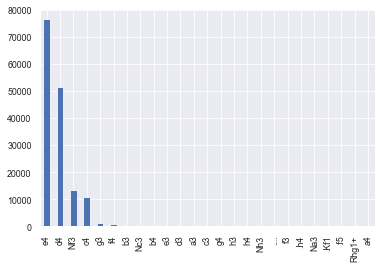

In [20]:
openings_white['W1'].value_counts().plot.bar();

It's interesting to note that Black's opening move list is more diverse than White's. This is most likely due to the reactionary nature of the game for Black.

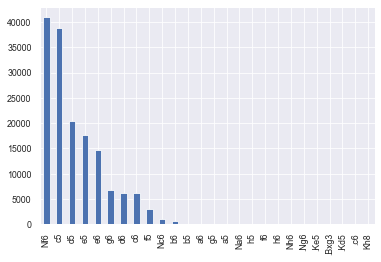

In [21]:
openings_black['B1'].value_counts().plot.bar();

One interesting thing to note here is how quickly there will be different chess games developing. Observe how many more moves are played at move 2 and 3. However, we can still observe that most games play out very similarly at the beginning.

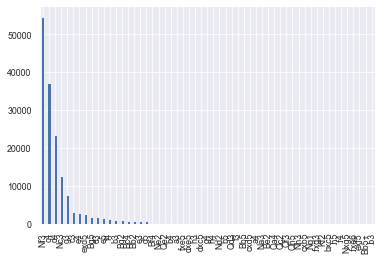

In [32]:
openings_white['W2'].value_counts().plot.bar();

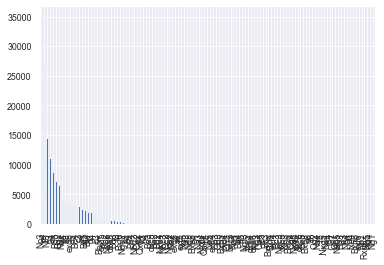

In [33]:
openings_white['W3'].value_counts().plot.bar();

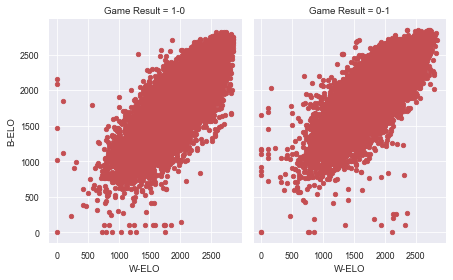

In [22]:
g = sns.FacetGrid(chess_data, col = 'Game Result', height = 4, aspect = 0.8)
g.map(plt.scatter, 'W-ELO', 'B-ELO', s = 20, color = "r");

In the facet grid above we can see an interesting feature. There are many outliers. 

From the plot below we see that we can take out some of those outliers by further cleaning the data to include only ELO ratings above 500.

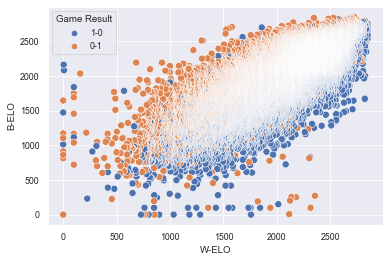

In [23]:
sns.scatterplot(x = 'W-ELO', y = 'B-ELO', hue = 'Game Result', data = chess_data, s = 50);

In [24]:
# trim low ELO ratings and reassign openings dataframes.
chess_data = chess_data[chess_data['W-ELO'] >= 500]
chess_data = chess_data[chess_data['B-ELO'] >= 500]

openings_white = chess_data.loc[:, 'W1': 'W8': 2] 
openings_black = chess_data.loc[:, 'B1': 'B8': 2] 

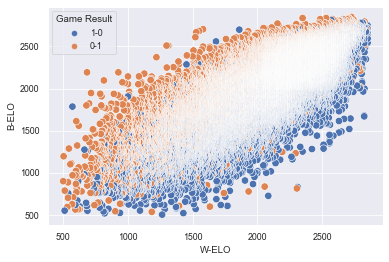

In [25]:
sns.scatterplot(x = 'W-ELO', y = 'B-ELO', hue = 'Game Result', data = chess_data, s = 55);

That looks much better but this plot shows somethings strange. Why are there so many games where the better player loses to the vastly worse player? For example, there are games where White is above 2000 ELO and loses to players below 1000. Perhaps this is an indication of match fixing, https://nextlevelchess.blog/pre-arranged/

Another thing we observe is that the very best players win or lose at about the same rate (the end of the scatter plot is pointy).

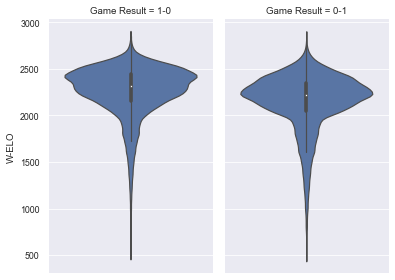

In [26]:
sns.catplot(y = 'W-ELO', col = 'Game Result', data = chess_data, kind = 'violin', height = 4, aspect = 0.7);

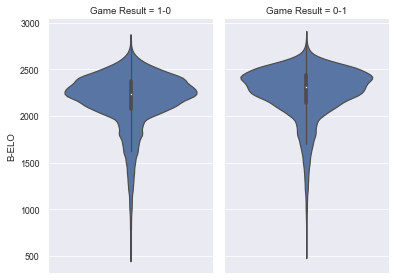

In [27]:
sns.catplot(y = 'B-ELO', col = 'Game Result', data = chess_data, kind = 'violin', height = 4, aspect = 0.7);

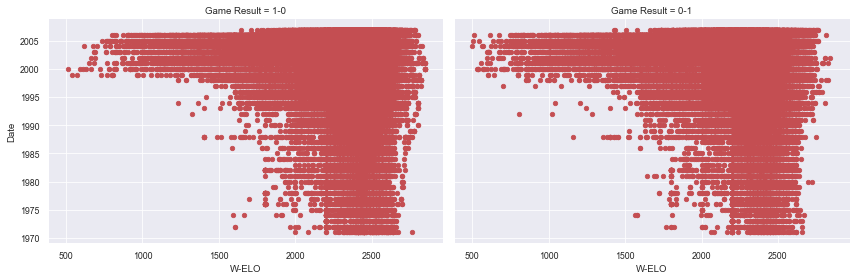

In [28]:
g = sns.FacetGrid(chess_data, col = 'Game Result', height = 4, aspect = 1.5)
g.map(plt.scatter, 'W-ELO', 'Date', s = 20, color = "r");

There are no recorded games with W-ELO below 1500 until the 1980s. That's probably due to better record keeping as the years went by.

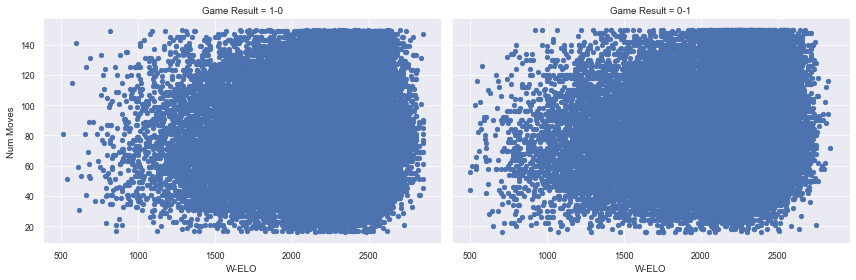

In [29]:
g = sns.FacetGrid(chess_data, col = 'Game Result', height = 4, aspect = 1.5)
g.map(plt.scatter, 'W-ELO', 'Num Moves', s = 20, color = "b");

The plot above seems to show that white loses more often when the game is shorter.

We can do more analysis if we convert the Game Results column to int. 1 represents a win for White, 0 repesents loss for White

In [39]:
def GetResults(x):
  if x[0] == '0':
    return 0
  else:
    return 1
new_col = chess_data['Game Result'].apply(GetResults)
chess_data['Game Result'] = new_col

In [42]:
chess_data.dtypes

Date            int32
Game Result     int64
W-ELO           int32
B-ELO           int32
Num Moves       int32
                ...  
B73            string
W74            string
B74            string
W75            string
B75            string
Length: 155, dtype: object

C:\Users\Abrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


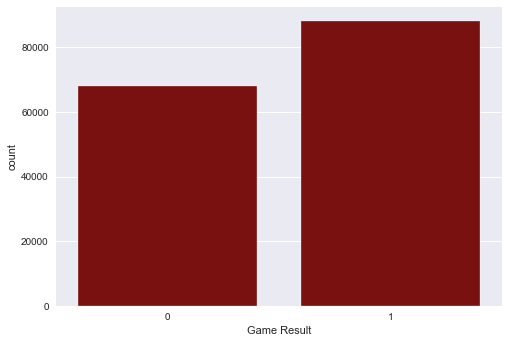

In [57]:
sns.countplot(chess_data['Game Result'], color = 'darkred');

<AxesSubplot:xlabel='W-ELO', ylabel='Count'>

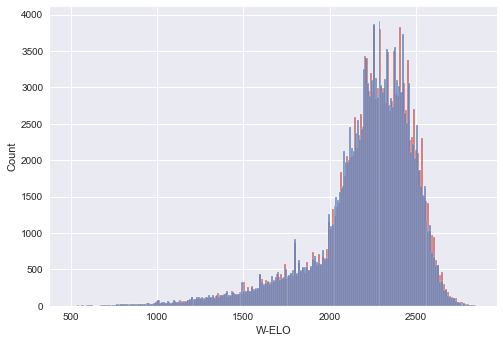

In [65]:
sns.histplot(chess_data['W-ELO'], color = 'r')
sns.histplot(chess_data['B-ELO'], color = 'b')

<AxesSubplot:xlabel='Date', ylabel='count'>

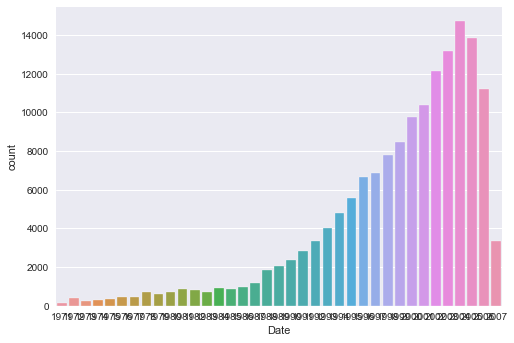

In [73]:
sns.countplot(x = chess_data['Date'])

<AxesSubplot:xlabel='W1', ylabel='count'>

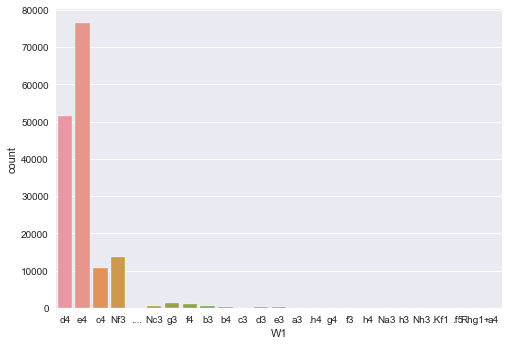

In [77]:
sns.countplot(x = openings_white['W1'])

<AxesSubplot:xlabel='B1', ylabel='count'>

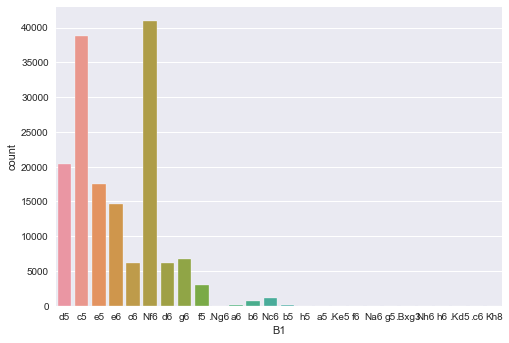

In [79]:
sns.countplot(x = openings_black['B1'])